In [19]:
N = int(input())
num_list = input().split(' ')
for i in range(len(num_list)) :
    num_list[i] = int(num_list[i])
if 1 in num_list :
    num_list.remove(1)
div_list = []
prime_list = []
for num in num_list :
    for i in range(2, num):
        if num % i == 0:
            div_list.append(i)
    if len(div_list) == 0 :
        prime_list.append(num)
    
    div_list = []

print(len(prime_list))

 4
 2 4 6 8


1


In [1]:
sens = 0.98
spec = 0.95
p_D = 0.001
#전체 인구에서 감염자 비율이 0.1%이고
#양성일때 실제로 걸렸을확률
sens*p_D/(sens*p_D + (1-spec)*(1-p_D)) 

0.019242096995876676

In [3]:
import tensorflow as tf
import pandas as pd
mlb = pd.read_csv('dataset/major_full.csv')

In [4]:
mlb

,TEAM,PAYROLL,AVG,ERA,OPS,RANK
0,Los Angeles Dodgers,"108,417,397",0.256,3.11,0.821,1
1,Tampa Bay Rays,"28,290,689",0.231,3.67,0.753,2
2,San Diego Padres,"73,097,954",0.255,4.09,0.798,3
3,Minnesota Twins,"55,679,689",0.238,3.52,0.743,4
4,Oakland Athletics,"36,720,178",0.227,3.99,0.718,5
...,...,...,...,...,...,...
85,St. Louis Cardinals,"161,005,146",0.249,3.85,0.730,13
86,Tampa Bay Rays,"78,231,049",0.258,3.74,0.740,10
87,Texas Rangers,"144,498,078",0.240,4.92,0.722,23
88,Toronto Blue Jays,"162,664,502",0.244,4.85,0.739,22


In [5]:
for i in range(len(mlb)):
    mlb['PAYROLL'][i]=mlb['PAYROLL'][i].replace(',',"")


<ipython-input-5-e472b4f66b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlb['PAYROLL'][i]=mlb['PAYROLL'][i].replace(',',"")


In [6]:
mlb['PAYROLL']

0     108417397
1      28290689
2      73097954
3      55679689
4      36720178
        ...    
85    161005146
86     78231049
87    144498078
88    162664502
89    181586759
Name: PAYROLL, Length: 90, dtype: object

In [7]:
mlb['PAYROLL']=pd.to_numeric(mlb['PAYROLL'])

In [8]:
mlb['final_rank'] = mlb['RANK]

SyntaxError: EOL while scanning string literal (<ipython-input-8-ae5959a26bf0>, line 1)

In [9]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TEAM     90 non-null     object 
 1   PAYROLL  90 non-null     int64  
 2   AVG      90 non-null     float64
 3   ERA      90 non-null     float64
 4   OPS      90 non-null     float64
 5   RANK     90 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ KB


In [10]:
mlb['2020PAYROLL']=pd.to_numeric(mlb['2020PAYROLL'])

KeyError: '2020PAYROLL'

In [11]:
mlb['PAYROLL']

0     108417397
1      28290689
2      73097954
3      55679689
4      36720178
        ...    
85    161005146
86     78231049
87    144498078
88    162664502
89    181586759
Name: PAYROLL, Length: 90, dtype: int64

In [12]:
display(mlb.describe())

,PAYROLL,AVG,ERA,OPS,RANK
count,9.000000e+01,90.000000,90.000000,90.000000,90.000000
mean,1.125018e+08,0.248011,4.371444,0.740989,15.500000
std,5.260002e+07,0.013137,0.601266,0.043822,8.703932
min,2.347864e+07,0.209000,3.110000,0.641000,1.000000
25%,7.282309e+07,0.240000,3.882500,0.707750,8.000000
50%,1.062334e+08,0.249000,4.285000,0.740500,15.500000
75%,1.539585e+08,0.257000,4.845000,0.769750,23.000000
max,2.356494e+08,0.274000,5.630000,0.848000,30.000000


In [13]:
mlb

,TEAM,PAYROLL,AVG,ERA,OPS,RANK
0,Los Angeles Dodgers,108417397,0.256,3.11,0.821,1
1,Tampa Bay Rays,28290689,0.231,3.67,0.753,2
2,San Diego Padres,73097954,0.255,4.09,0.798,3
3,Minnesota Twins,55679689,0.238,3.52,0.743,4
4,Oakland Athletics,36720178,0.227,3.99,0.718,5
...,...,...,...,...,...,...
85,St. Louis Cardinals,161005146,0.249,3.85,0.730,13
86,Tampa Bay Rays,78231049,0.258,3.74,0.740,10
87,Texas Rangers,144498078,0.240,4.92,0.722,23
88,Toronto Blue Jays,162664502,0.244,4.85,0.739,22


In [14]:
import numpy as np

In [15]:
mlb_data=mlb.drop('TEAM',axis=1)

In [16]:
mlb_data

,PAYROLL,AVG,ERA,OPS,RANK
0,108417397,0.256,3.11,0.821,1
1,28290689,0.231,3.67,0.753,2
2,73097954,0.255,4.09,0.798,3
3,55679689,0.238,3.52,0.743,4
4,36720178,0.227,3.99,0.718,5
...,...,...,...,...,...
85,161005146,0.249,3.85,0.730,13
86,78231049,0.258,3.74,0.740,10
87,144498078,0.240,4.92,0.722,23
88,162664502,0.244,4.85,0.739,22


In [116]:
mlb_shuffle = mlb_data.sample(frac = 1)

In [117]:
mlb_shuffle[1:2]

,PAYROLL,AVG,ERA,OPS,RANK
48,128391569,0.244,4.18,0.736,19


In [ ]:
for i in range(len(mlb_shuffle)):
    print(mlb_shuffle[i:i+1])


In [118]:
mlb_np = mlb_shuffle.to_numpy()

In [119]:
train_ratio = 0.9
input_cnt = 4
output_cnt = 1

train_idx = int(len(mlb_np)*train_ratio)
print("train_idx : ",train_idx)
print("test_idx : ", len(mlb_np)-train_idx)

train_idx :  81
test_idx :  9


In [120]:
train_X,train_Y = mlb_np[:train_idx,:-output_cnt],mlb_np[:train_idx,-output_cnt:]
test_X,test_Y = mlb_np[train_idx:,:-output_cnt],mlb_np[train_idx:,-output_cnt:]

In [121]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(81, 4)
(81, 1)
(9, 4)
(9, 1)


In [122]:
train_x_mean = np.mean(train_X, axis = 0)
train_x_std  = train_X.std(axis = 0)

In [123]:
train_X -= train_x_mean
train_X /= train_x_std

In [124]:
test_X -= train_x_mean
test_X /= train_x_std

In [125]:
df_test_X = pd.DataFrame(test_X)
df_test_X.describe()

,0,1,2,3
count,9.000000,9.000000,9.000000,9.000000
mean,0.656469,0.252878,-0.524960,0.379636
std,0.916381,0.397812,0.816235,0.690295
min,-0.710426,-0.489441,-2.145311,-0.814099
25%,0.428878,0.097888,-1.000558,-0.051504
50%,0.726435,0.318137,-0.502839,0.397081
75%,1.144170,0.538385,-0.121255,0.935383
max,2.165145,0.685218,0.708276,1.316680


In [126]:
import tensorflow as tf
NEW_MODEL = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(4,))
])

In [127]:
NEW_MODEL.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [128]:
NEW_MODEL.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                 loss = 'mse')

In [129]:
history_1 = NEW_MODEL.fit(train_X,train_Y,epochs=200,batch_size=4)

Epoch 1/200
21/21 [==============================] - 0s 475us/step - loss: 293.5056
Epoch 2/200
21/21 [==============================] - 0s 332us/step - loss: 215.4965
Epoch 3/200
21/21 [==============================] - 0s 380us/step - loss: 156.4768
Epoch 4/200
21/21 [==============================] - 0s 380us/step - loss: 113.3358
Epoch 5/200
21/21 [==============================] - 0s 380us/step - loss: 80.6640
Epoch 6/200
21/21 [==============================] - 0s 333us/step - loss: 58.3248
Epoch 7/200
21/21 [==============================] - 0s 427us/step - loss: 42.8174
Epoch 8/200
21/21 [==============================] - 0s 380us/step - loss: 31.7619
Epoch 9/200
21/21 [==============================] - 0s 427us/step - loss: 24.7535
Epoch 10/200
21/21 [==============================] - 0s 333us/step - loss: 20.1799
Epoch 11/200
21/21 [==============================] - 0s 380us/step - loss: 17.4907
Epoch 12/200
21/21 [==============================] - 0s 380us/step - loss: 15.80

In [130]:
NEW_MODEL.evaluate(test_X,test_Y)

1/1 [==============================] - 0s 996us/step - loss: 12.1073


12.107259750366211

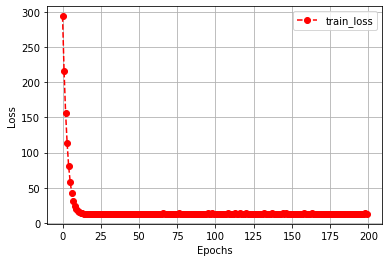

In [131]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['loss'],'--o',color='red',label='train_loss')
#plt.plot(history_2.history['val_loss'],'--s',color='green',label='val_loss') val 값 없음

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [132]:
pred_Y = NEW_MODEL.predict(test_X)
print(pred_Y)
print(test_Y)

[[ 6.312813 ]
 [23.159449 ]
 [ 7.0731964]
 [14.452523 ]
 [ 3.1441097]
 [ 9.905454 ]
 [12.336342 ]
 [19.13045  ]
 [10.91935  ]]
[[ 3.]
 [28.]
 [ 3.]
 [ 9.]
 [ 2.]
 [15.]
 [12.]
 [19.]
 [10.]]


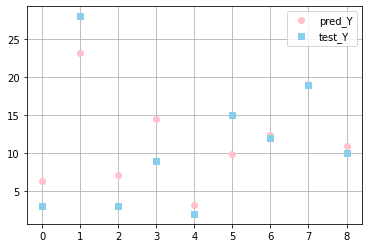

In [133]:
plt.plot(pred_Y[:],'o',color='pink',label='pred_Y')
plt.plot(test_Y[:],'s',color='skyblue',label='test_Y')
plt.legend()
plt.grid()
plt.show()